In [149]:
from matplotlib.image import imread
from matplotlib.image import imsave
from matplotlib.pyplot import imshow
from enum import Enum
import numpy as np
import matplotlib.pyplot as plt
import math
from math import degrees, sqrt, cos, acos


In [223]:
class ColorModel(Enum):
    rgb = 0
    hsv = 1
    hsi = 2
    hsl = 3
    gray = 4  # obraz 2d

class BaseImage:
    data: np.ndarray
    color_model: ColorModel

    def __init__(self, path: str = None) -> None:
        if(path is None):
            return
        else:
            self.data = ((imread(path))*255).astype('uint8')
    def save_img(self, path: str) -> None:
        imsave(path, self.data)

    def show_img(self) -> None:
        plt.imshow(self.data)
        plt.show()

    def get_layer(self, layer_id: int) -> 'BaseImage':
        layer = self.data[:, :, layer_id]
        return layer

    def to_hsv(self) -> 'BaseImage':
        hsv = np.empty(self.data.shape)
        self.data = self.data.astype(np.float64)
        for x in range(self.data.shape[0]):
            for y in range(self.data.shape[1]):

                r = self.data[x, y][0]
                g = self.data[x, y][1]
                b = self.data[x, y][2]

                M = max(r, g, b)
                m = min(r, g, b)

                if g >= b:
                    hsv[x, y][0] = degrees(acos((r - 0.5 * g - 0.5 * b) / sqrt(r ** 2 + g ** 2 + b ** 2 - r*g - r*b - g*b)))
                else:
                    hsv[x, y][0] = 360 - degrees(acos((r - 0.5 * g - 0.5 * b) / sqrt(r ** 2 + g ** 2 + b ** 2 - r*g - r*b - g*b)))

                if M > 0:
                    hsv[x, y][1] = 1 - (m/M)
                else:
                    hsv[x, y][1] = 0

                hsv[x, y][2] = M / 255

        img.data = hsv
        img.color_model = 1
        return img


    def to_hsi(self) -> 'BaseImage':
        hsi = np.empty(self.data.shape)
        self.data = self.data.astype(np.float64)
        for x in range(self.data.shape[0]):
            for y in range(self.data.shape[1]):

                r = self.data[x, y][0]
                g = self.data[x, y][1]
                b = self.data[x, y][2]

                M = max(r, g, b)
                m = min(r, g, b)

                if g >= b:
                    hsi[x, y][0] = degrees(acos((r - 0.5 * g - 0.5 * b) / sqrt(r ** 2 + g ** 2 + b ** 2 - r*g - r*b - g*b)))
                else:
                    hsi[x, y][0] = 360 - degrees(acos((r - 0.5 * g - 0.5 * b) / sqrt(r ** 2 + g ** 2 + b ** 2 - r*g - r*b - g*b)))

                if M > 0:
                    hsi[x, y][1] = 1 - (m/M)
                else:
                    hsi[x, y][1] = 0

                hsi[x, y][2] = (r + g + b) / 3

        img.data = hsi
        img.color_model = 2
        return img

    def to_hsl(self) -> 'BaseImage':
        hsl = np.empty(self.data.shape)
        self.data = self.data.astype(np.float64)
        for x in range(self.data.shape[0]):
            for y in range(self.data.shape[1]):

                r = self.data[x, y][0]
                g = self.data[x, y][1]
                b = self.data[x, y][2]

                M = max(r, g, b)
                m = min(r, g, b)
                d = (M-m) / 255
                hsl[x, y][2] = (0.5*(M+m)) / 255

                if hsl[x, y][2] > 0:
                    hsl[x, y][1] = d / (1-abs(2*(hsl[x, y][2])-1))
                else:
                    hsl[x, y][1] = 0

                if g >= b:
                    hsl[x, y][0] = degrees(acos((r - 0.5 * g - 0.5 * b) / sqrt(r ** 2 + g ** 2 + b ** 2 - r*g - r*b - g*b)))
                else:
                    hsl[x, y][0] = 360 - degrees(acos((r - 0.5 * g - 0.5 * b) / sqrt(r ** 2 + g ** 2 + b ** 2 - r*g - r*b - g*b)))

        img.data = hsl
        img.color_model = 3
        return img

    def to_rgb(self) -> 'BaseImage':

        if img.color_model == 1:
            hsv = np.empty(self.data.shape)
            for x in range(self.data.shape[0]):
                for y in range(self.data.shape[1]):
                    h = self.data[x, y][0]
                    s = self.data[x, y][1]
                    v = self.data[x, y][2]
                    M = v * 255
                    m = M * (1 - s)
                    z = (M - m) * (1 - abs(((h / 60) % 2) - 1))
                    if h >= 0 and h < 60:
                        hsv[x, y][0] = M
                        hsv[x, y][1] = z + m
                        hsv[x, y][2] = m
                    elif h >= 60 and h < 120:
                        hsv[x, y][0] = z + m
                        hsv[x, y][1] = M
                        hsv[x, y][2] = m
                    elif h >= 120 and h < 180:
                        hsv[x, y][0] = m
                        hsv[x, y][1] = M
                        hsv[x, y][2] = z + m
                    elif h >= 180 and h < 240:
                        hsv[x, y][0] = m
                        hsv[x, y][1] = M
                        hsv[x, y][2] = z + m
                    elif h >= 240 and h < 300:
                        hsv[x, y][0] = z + m
                        hsv[x, y][1] = m
                        hsv[x, y][2] = M
                    elif h >= 300 and h < 360:
                        hsv[x, y][0] = M
                        hsv[x, y][1] = m
                        hsv[x, y][2] = z + m

            img.data = hsv

        elif img.color_model == 2:
            hsi = np.empty(self.data.shape)
            for x in range(self.data.shape[0]):
                for y in range(self.data.shape[1]):
                    h = self.data[x, y][0]
                    s = self.data[x, y][1]
                    i = self.data[x, y][2]
                    if h == 0:
                        hsi[x, y][0] = i + (2 * i * s)
                        hsi[x, y][1] = i - (i * s)
                        hsi[x, y][2] = i - (i * s)
                    elif h > 0 and h < 120:
                        hsi[x, y][0] = i + (i * s * cos(h) / cos(60 - h))
                        hsi[x, y][1] = i + (i * s * (1 - cos(h) / cos(60 - h)))
                        hsi[x, y][2] = i - (i * s)
                    elif h == 120:
                        hsi[x, y][0] = i - (i * s)
                        hsi[x, y][1] = i + (2 * i * s)
                        hsi[x, y][2] = i - (i * s)
                    elif h > 120 and h < 240:
                        hsi[x, y][0] = i - (i * s)
                        hsi[x, y][1] = i + (i * s * cos(h - 120) / cos(180 - h))
                        hsi[x, y][2] = i + (i * s * (1 - cos(h - 120) / cos(180 - h)))
                    elif h == 240:
                        hsi[x, y][0] = i - (i * s)
                        hsi[x, y][1] = i - (i * s)
                        hsi[x, y][2] = i + (2 * i * s)
                    elif h > 240 and h < 360:
                        hsi[x, y][0] = i + (i * s *(1 - cos(h - 240) / cos(300 - h)))
                        hsi[x, y][1] = i - (i * s)
                        hsi[x, y][2] = i + (i * s * cos(h - 240) / cos(300 - h))

            img.data = hsi

        if img.color_model == 3:
            hsl = np.empty(self.data.shape)
            for x in range(self.data.shape[0]):
                for y in range(self.data.shape[1]):
                    h = self.data[x, y][0]
                    s = self.data[x, y][1]
                    l = self.data[x, y][2]
                    d = s * (1 - abs((2 * l) - 1))
                    m = 255 * (l - (0.5 * d))
                    x = d * (1 - abs(((h / 60) % 2) - 1))
                    if h >= 0 and h < 60:
                        hsl[x, y][0] = 255 * d + m
                        hsl[x, y][1] = 255 * x + m
                        hsl[x, y][2] = m
                    elif h >= 60 and h < 120:
                        hsl[x, y][0] = 255 * x + m
                        hsl[x, y][1] = 255 * d + m
                        hsl[x, y][2] = m
                    elif h >= 120 and h < 180:
                        hsl[x, y][0] = m
                        hsl[x, y][1] = 255 * d + m
                        hsl[x, y][2] = 255 * x + m
                    elif h >= 180 and h < 240:
                        hsl[x, y][0] = m
                        hsl[x, y][1] = 255 * x + m
                        hsl[x, y][2] = 255 * d + m
                    elif h >= 240 and h < 300:
                        hsl[x, y][0] = 255 * x + m
                        hsl[x, y][1] = m
                        hsl[x, y][2] = 255 * d + m
                    elif h >= 300 and h < 360:
                        hsl[x, y][0] = 255 * d + m
                        hsl[x, y][1] = m
                        hsl[x, y][2] = 255* x + m
            img.data = hsl

        img.data = (img.data).astype(np.uint8)
        img.color_model = 0
        return img

In [224]:
#img = BaseImage('./Lenna.jpg')
#img.show_img()
#r = img.get_layer(0)
#g = img.get_layer(1)
#b = img.get_layer(2)
#plt.imshow(np.dstack((r, g, b)))
#plt.show()

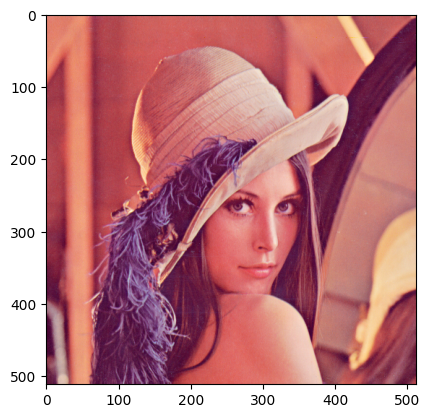

In [228]:
img = BaseImage('./Lenna.jpg')
img_hsv = img.to_hsv()
from_hsv = img_hsv.to_rgb()
imshow(from_hsv.data)

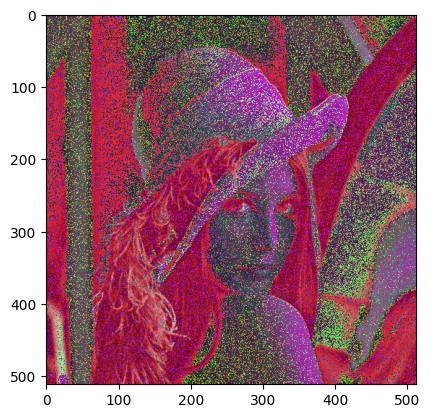

In [226]:
img = BaseImage('./Lenna.jpg')
img_hsi = img.to_hsi()
from_hsi = img_hsi.to_rgb()
imshow(from_hsi.data)

In [202]:
img = BaseImage('./Lenna.jpg')
img_hsl = img.to_hsl()
from_hsl = img_hsl.to_rgb()
imshow(from_hsl.data)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices